In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [87]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/jason_kenny.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1416920656940204034,1416920656940204032,2021-07-19 06:09:44 India Standard Time,2021-07-19,06:09:44,530,21525682,jkenney,Jason Kenney,,...,,,,,,[],,,,
1,1416907133833125889,1416907133833125888,2021-07-19 05:16:00 India Standard Time,2021-07-19,05:16:00,530,21525682,jkenney,Jason Kenney,,...,,,,,,[],,,,
2,1416852020712124424,1416852020712124416,2021-07-19 01:37:00 India Standard Time,2021-07-19,01:37:00,530,21525682,jkenney,Jason Kenney,,...,,,,,,[],,,,


In [88]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Fantastic', 'Showdown', 'Sunday', 'at', 'the', 'Rodeo', 'to', 'close', 'out', 'an', 'amazing', 'ten', 'days', 'of', 'the', '@calgarystampede!', 'Congrats', 'to', 'all', 'of', 'the', 'big', 'winners', 'at', 'the', 'Rodeo,', 'and', 'thanks', 'to', 'thousands', 'of', 'volunteers', 'and', 'staff', 'for', 'putting', 'on', 'the', 'greatest', 'outdoor', 'show', 'on', 'Earth!', '#CalgaryStampede', 'https://t.co/GpV8ZhHg5b', 'What', 'a', 'great', 'Stampede!', 'Such', 'a', 'joy', 'to', 'connect', 'with', 'Albertans', 'during', 'Canada’s', 'first', 'major', 'event', 'after', 'the', 'pandemic.', 'Thank', 'you', 'to', 'everyone', 'who', 'made', 'it', 'possible', '–', 'and', 'see', 'you', 'next', 'year!', '#calgarystampede2021', '#OpenForSummer', '#yyc', 'https://t.co/H3O5HB2qSQ', 'Great', 'to', 'see', 'many', 'exciting', 'events', 'coming', 'to', 'Edmonton.', 'Growing', 'culture', 'and', 'tourism', 'is', 'a', 'big', 'part', 'of', 'Alberta’s', 'Recovery', 'Plan.', 'https://t.co/GTwULHJDim', 'We', 

In [89]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [90]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['fantast',
 'showdown',
 'sunday',
 'at',
 'the',
 'rodeo',
 'to',
 'close',
 'out',
 'an',
 'amaz',
 'ten',
 'day',
 'of',
 'the',
 'calgarystamped',
 'congrat',
 'to',
 'all',
 'of',
 'the',
 'big',
 'winner',
 'at',
 'the',
 'rodeo',
 'and',
 'thank',
 'to',
 'thousand',
 'of',
 'volunt',
 'and',
 'staff',
 'for',
 'put',
 'on',
 'the',
 'greatest',
 'outdoor',
 'show',
 'on',
 'earth',
 'calgarystamped',
 'httpstcogpv8zhhg5b',
 'what',
 'a',
 'great',
 'stamped',
 'such',
 'a',
 'joy',
 'to',
 'connect',
 'with',
 'albertan',
 'dure',
 'canada',
 'first',
 'major',
 'event',
 'after',
 'the',
 'pandem',
 'thank',
 'you',
 'to',
 'everyon',
 'who',
 'made',
 'it',
 'possibl',
 'and',
 'see',
 'you',
 'next',
 'year',
 'calgarystampede2021',
 'openforsumm',
 'yyc',
 'httpstcoh3o5hb2qsq',
 'great',
 'to',
 'see',
 'mani',
 'excit',
 'event',
 'come',
 'to',
 'edmonton',
 'grow',
 'cultur',
 'and',
 'tourism',
 'is',
 'a',
 'big',
 'part',
 'of',
 'alberta',
 'recoveri',
 'plan',
 'ht

In [91]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['fantast',
 'showdown',
 'sunday',
 'rodeo',
 'close',
 'amaz',
 'day',
 'calgarystamped',
 'congrat',
 'big',
 'winner',
 'rodeo',
 'thank',
 'thousand',
 'volunt',
 'staff',
 'greatest',
 'outdoor',
 'earth',
 'calgarystamped',
 'httpstcogpv8zhhg5b',
 'great',
 'stamped',
 'joy',
 'connect',
 'albertan',
 'dure',
 'canada',
 'major',
 'event',
 'pandem',
 'thank',
 'everyon',
 'possibl',
 'year',
 'calgarystampede2021',
 'openforsumm',
 'yyc',
 'httpstcoh3o5hb2qsq',
 'great',
 'mani',
 'excit',
 'event',
 'come',
 'edmonton',
 'grow',
 'cultur',
 'tourism',
 'big',
 'alberta',
 'recoveri',
 'plan',
 'httpstcogtwulhjdim',
 'alberta',
 'farmer',
 'rancher',
 'sure',
 'support',
 'extrem',
 'condit',
 'httpstcoapc48vqwyj',
 'sofina',
 'food',
 'new',
 '200',
 'million',
 'chicken',
 'process',
 'plant',
 'open',
 'coupl',
 'month',
 'calgari',
 'creat',
 '450',
 'wellpay',
 'job',
 'alberta',
 'recoveri',
 'plan',
 'diversifi',
 'economi',
 'job',
 'tomorrow',
 'httpstcoavp6wvfcsk',
 '

In [92]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [93]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 1638, 2: 354, 3: 193, 4: 126, 5: 92, 6: 69, 7: 42, 8: 36, 9: 26, 10: 25, ...})

In [94]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


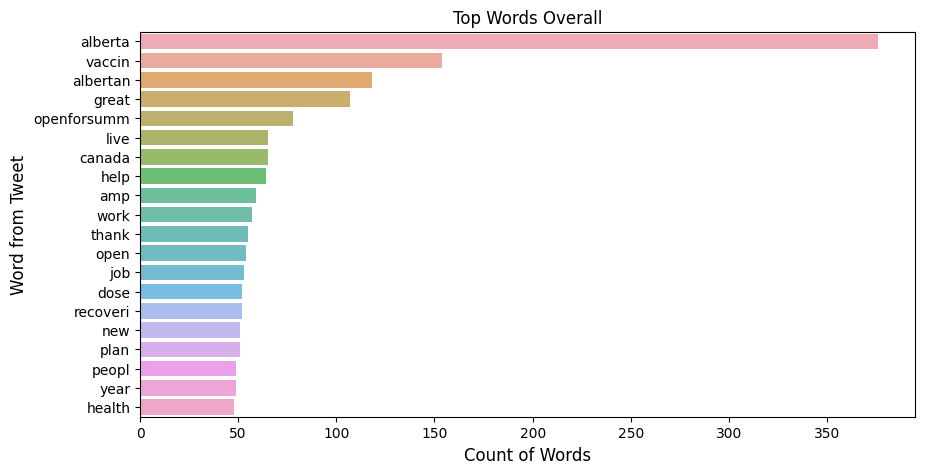

In [95]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [39]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [26]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [96]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


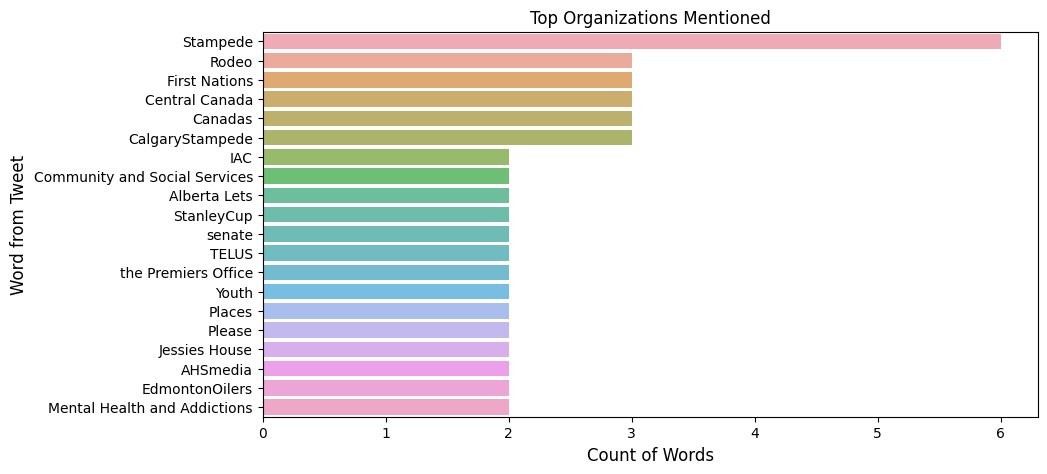

In [97]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [98]:
df.to_csv("kenny.csv")